# Подготовительные моменты

Подключение необходимых библиотек.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures, StandardScaler
sns.set_theme()

Создание DataFrame из csv-файла с данными о бриллиантах.

In [2]:
diamonds = pd.read_csv("diamonds.csv")

# Первый взгляд на набор данных

Набор данных о бриллиантах содержит следующие признаки:
- carat - масса в каратах;
- cut - качество огранки;
- color - качество цвета;
- clarity - степень чистоты;
- depth - общая глубина в процентах;
- table - площадка в процентах;
- price - стоимость в долларах;
- x - длина в миллиметрах;
- y - ширина в миллиметрах;
- z - глубина в миллиметрах.

In [3]:
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Сразу же удаляем первый столбец, обозначающий номер бриллианта, так как в дальнейшем он может сильно повлиять на регрессию, задавая искусственный порядок.

In [5]:
diamonds.drop(columns=["Unnamed: 0"], inplace=True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Просмотр основных числовых характеристик количественных признаков, а именно для каждого столбца подсчитываются: количество непустых записей, среднее значение, среднее квадратическое отклонение, минимальное значение, первый квартиль, второй квартиль (медиана), третий квартиль и максимальное значение.

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Из полученной таблицы видно, что в наборе данных есть бриллианты, для которых минимальные значения признаков длина (x), ширина (y), глубина (z) равны нулю. Очевидно, не может быть бриллиантов нулевого размера, поэтому позже будет необходимо восстановить значения данных признаков, где это возможно.

Просмотр основных числовых характеристик категориальных признаков, а именно для каждого столбца подсчитываются: количество непустых записей, количество уникальных записей, самая частая запись и ее частота.

In [7]:
diamonds.describe(include="object")

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


Просмотр количества пропусков в данных.

In [8]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Видно, что пропусков в чистом виде нет, но, как было замечено ранее, у некоторых бриллиантов в признаках x, y, z есть нулевые значения, от которых необходимо избавиться.

Просмотр дубликатов в данных.

In [9]:
diamonds[diamonds.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


Удаляем дубликаты в наборе данных и пересчитываем индексы строк после удаления записей.

In [10]:
diamonds.drop_duplicates(inplace=True)
diamonds.reset_index(drop=True, inplace=True)
diamonds[diamonds.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z


# Визуализация распределений значений признаков

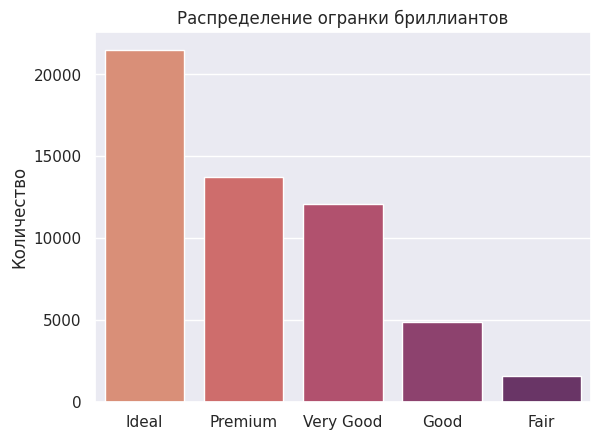

In [11]:
cut_order = ["Ideal", "Premium", "Very Good", "Good", "Fair"]

sns.countplot(
    diamonds, x="cut", hue="cut", order=cut_order, hue_order=cut_order, palette="flare"
).set(
    title="Распределение огранки бриллиантов", xlabel="", ylabel="Количество"
);

Из полученной диаграммы видно, что распределение огранки бриллантов близко к равномерному. Большинство бриллиантов имеют высокое качество огранки.

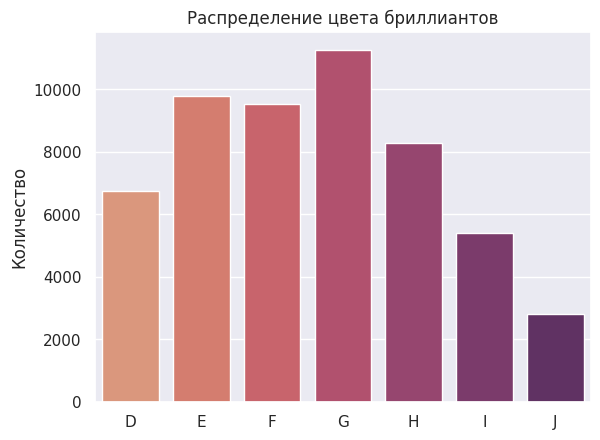

In [12]:
color_order = ["D", "E", "F", "G", "H", "I", "J"]

sns.countplot(
    diamonds, x="color", hue="color", order=color_order, hue_order=color_order, palette="flare"
).set(
    title="Распределение цвета бриллиантов", xlabel="", ylabel="Количество"
);

Из полученной диаграммы видно, что распределение цвета бриллиантов близко к нормальному. Бриллиантов "хорошего" цвета в целом больше, чем бриллиантов "плохого" цвета.

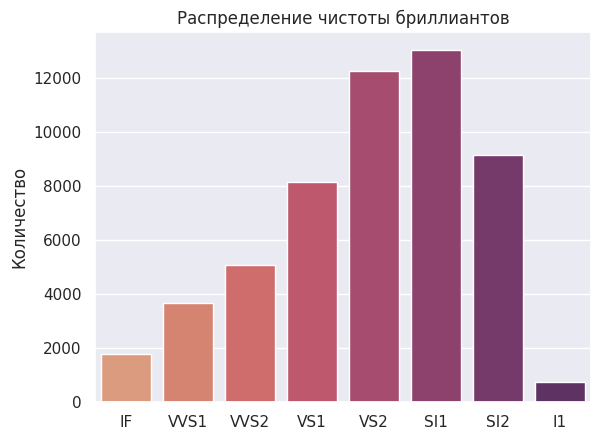

In [13]:
clarity_order = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"]

sns.countplot(
    diamonds, x="clarity", hue="clarity", order=clarity_order, hue_order=clarity_order, palette="flare"
).set(
    title="Распределение чистоты бриллиантов", xlabel="", ylabel="Количество"
);

Из полученной диаграммы видно, что распределение чистоты бриллиантов близко к нормальному. Большинство бриллиантов имеют низкий показатель чистоты.

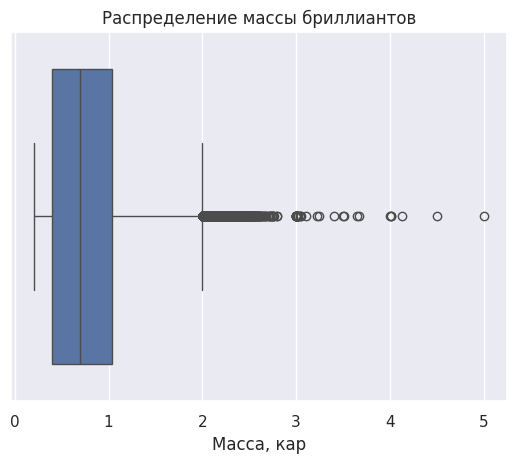

In [14]:
sns.boxplot(x=diamonds.carat).set(
    title="Распределение массы бриллиантов", xlabel="Масса, кар"
);

Из полученной диаграммы видно, что масса бриллиантов в основном распределена от 0,5 до 1 карата (100-200 мг). Также в наборе данных представлено некоторое количество бриллиантов с массой более 2 карат.

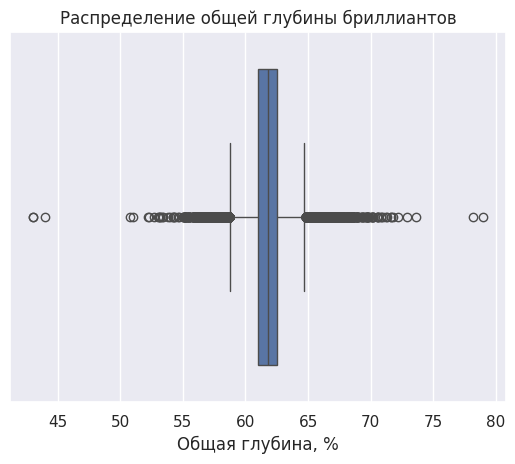

In [15]:
sns.boxplot(x=diamonds.depth).set(
    title="Распределение общей глубины бриллиантов", xlabel="Общая глубина, %"
);

Из полученной диаграммы видно, что общая глубина бриллиантов в основном распределена в диапозоне от 61% до 62,5%, подтверждая тот факт, что большинство бриллиантов имеют идеальную огранку. Некоторое количество значений значительно отстоят от общего распределения.

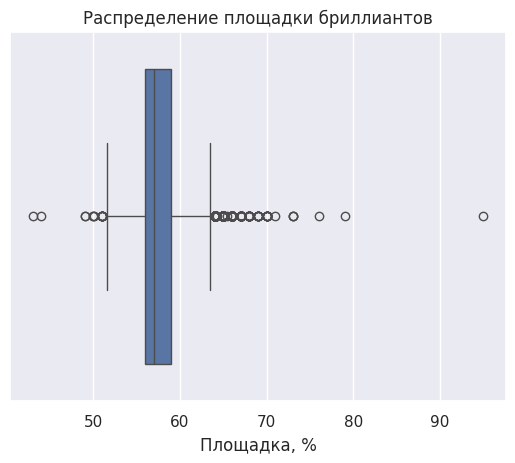

In [16]:
sns.boxplot(x=diamonds.table).set(
    title="Распределение площадки бриллиантов", xlabel="Площадка, %"
);

Из полученной диаграммы видно, что площадка бриллиантов в основном распределена в диапозоне от 56% до 59%, ещё раз подтверждая тот факт, что большинство бриллиантов имеют идеальную огранку. Некоторое количество значений значительно отстоят от общего распределения.

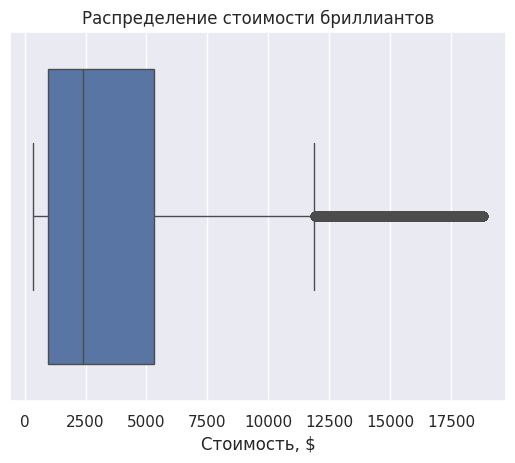

In [17]:
sns.boxplot(x=diamonds.price).set(
    title="Распределение стоимости бриллиантов", xlabel="Стоимость, $"
);

Из полученной диаграммы видно, что стоимость бриллиантов в основном распределена в диапозоне от 1000 до 5000 долларов, но также представлено некоторое количество экземпляров стоимостью более 15000 долларов.

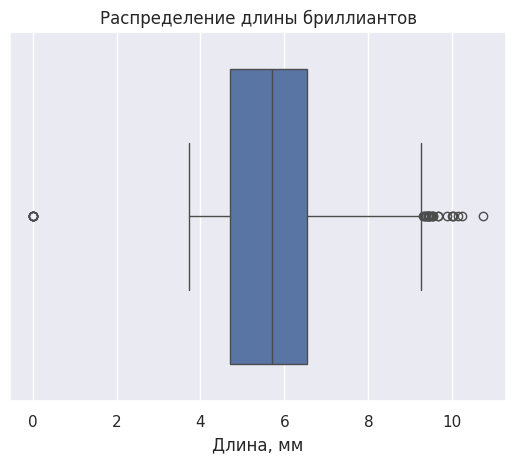

In [18]:
sns.boxplot(x=diamonds.x).set(
    title="Распределение длины бриллиантов", xlabel="Длина, мм"
);

Из полученной диаграммы видно, что длина бриллиантов в основном распределена в диапозоне от 5 до 7 мм, но также представлено некоторое количество экземпляров длиной более 9 мм. Также хорошо видны нулевые значения, действия по устранению которых уже были описаны ранее. Заметно аномальное значение, которое будет необходимо проверить.

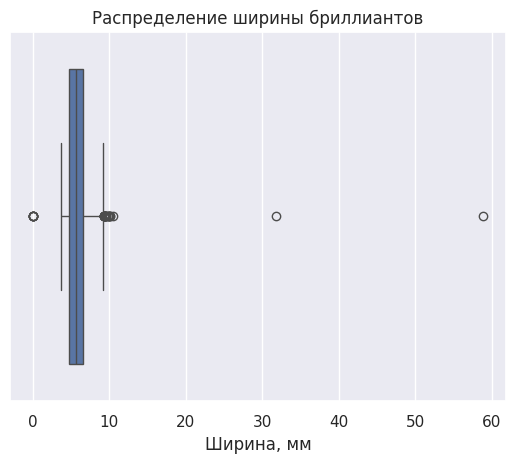

In [19]:
sns.boxplot(x=diamonds.y).set(
    title="Распределение ширины бриллиантов", xlabel="Ширина, мм"
);

Из полученной диаграммы видно, что ширина бриллиантов в основном распределена аналогично длине. Это логично, так как бриллианты почти всегда симметричны. Также хорошо видны нулевые значения, действия по устранению которых уже были описаны ранее. Сильно заметны два аномальных значения, которые будет необходимо удалить.

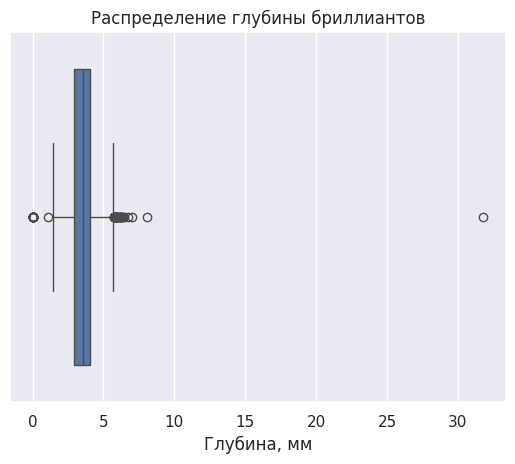

In [20]:
sns.boxplot(x=diamonds.z).set(
    title="Распределение глубины бриллиантов", xlabel="Глубина, мм"
);

Из полученной диаграммы видно, что глубина бриллиантов в основном распределена в диапозоне от 3 до 4 мм, но также представлено некоторое количество экземпляров длиной более 6 мм. Также хорошо видны нулевые значения, действия по устранению которых уже были описаны ранее. Сильно заметно одно аномальное значение, которое будет необходимо удалить.

# Восстановление нулевых значений и удаление аномалий

Рассмотрим записи о бриллиантах, в которых среди признаков x, y, z более одного признака принимают значение 0.

In [21]:
diamonds[(diamonds == 0).sum(axis=1) > 1]

,carat,cut,color,clarity,depth,table,price,x,y,z
11156,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11935,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15914,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24464,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26183,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27364,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49413,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


Удалим данные записи, так как восстановить нулевые значения в них невозможно.

In [22]:
diamonds.drop(diamonds[(diamonds == 0).sum(axis=1) > 1].index, inplace=True)
diamonds[(diamonds == 0).sum(axis=1) > 1]

,carat,cut,color,clarity,depth,table,price,x,y,z


Рассмотрим записи о бриллиантах, в которых среди признаков x, y, z только однин признак принимает значение 0.

In [23]:
diamonds_index = diamonds[(diamonds == 0).sum(axis=1) > 0].index
diamonds.loc[diamonds_index]

,carat,cut,color,clarity,depth,table,price,x,y,z
2201,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2308,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4778,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5457,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10145,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
13570,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
24338,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
26063,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
27047,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
27438,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0


Во всех найденных записях данным признаком является глубина (z), значения которой можно восстановить по формуле:

In [24]:
diamonds.loc[diamonds_index, "z"] = round(
    diamonds.depth * (diamonds.x + diamonds.y) / 200, 2
)
diamonds.loc[diamonds_index]

,carat,cut,color,clarity,depth,table,price,x,y,z
2201,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,3.85
2308,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,3.85
4778,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,4.09
5457,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,3.84
10145,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,4.54
13570,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,4.06
24338,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,5.03
26063,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,5.19
27047,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,5.14
27438,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,5.01


Теперь создадим копию набора данных, в которой будем удалять все записи, содержащие какие-либо аномальные значения.

In [25]:
diamonds_new = diamonds.copy()

Рассмотрим бриллианты, имеющие массу 4 карата и более.

In [26]:
diamonds_index = diamonds_new[diamonds_new.carat >= 4].index
diamonds_new.loc[diamonds_index]

,carat,cut,color,clarity,depth,table,price,x,y,z
25939,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25940,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26383,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
27065,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27350,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27563,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


Из полученной таблицы видно, что количество найденных записей невелико, притом, судя по диаграмме, полученной в предыдущем разделе, такие значения массы значительно отстоят от общего распределения. Удалим эти записи ради улучшения качества работы модели и посмотрим на новое распределение значений массы бриллиантов.

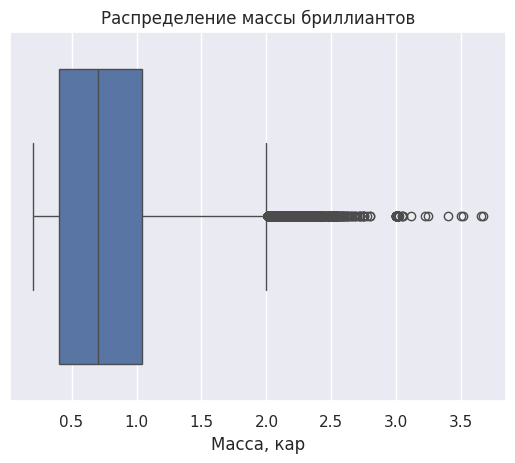

In [27]:
diamonds_new.drop(diamonds_index, inplace=True)
sns.boxplot(x=diamonds_new.carat).set(
    title="Распределение массы бриллиантов", xlabel="Масса, кар"
);

Рассмотрим бриллианты, имеющие общую глубину менее 50% или более 75%.

In [28]:
diamonds_index = diamonds_new[(diamonds_new.depth < 50) | (diamonds_new.depth > 75)].index
diamonds_new.loc[diamonds_index]

,carat,cut,color,clarity,depth,table,price,x,y,z
4506,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
6325,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
10353,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12
41787,1.03,Fair,E,I1,78.2,54.0,1262,5.72,5.59,4.42
52715,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


Из полученной таблицы видно, что количество найденных записей невелико, притом, судя по диаграмме, полученной в предыдущем разделе, такие значения общей глубины значительно отстоят от общего распределения. Удалим эти записи ради улучшения качества работы модели и посмотрим на новое распределение значений общей глубины бриллиантов.

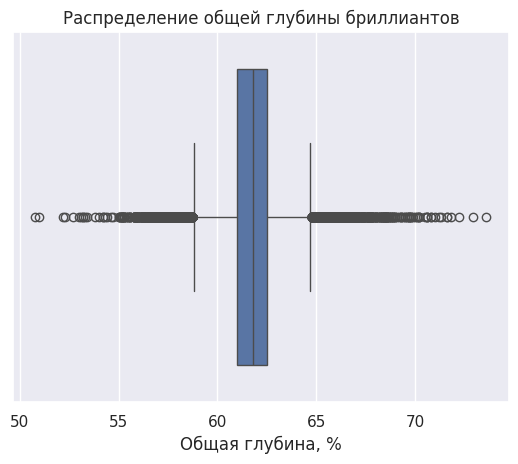

In [29]:
diamonds_new.drop(diamonds_index, inplace=True)
sns.boxplot(x=diamonds_new.depth).set(
    title="Распределение общей глубины бриллиантов", xlabel="Общая глубина, %"
);

Рассмотрим бриллианты, имеющие площадку менее 50% или более 75%.

In [30]:
diamonds_index = diamonds_new[(diamonds_new.table < 50) | (diamonds_new.table > 75)].index
diamonds_new.loc[diamonds_index]

,carat,cut,color,clarity,depth,table,price,x,y,z
5964,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
11340,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
22651,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
24875,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87
35531,0.29,Very Good,E,VS1,62.8,44.0,474,4.20,4.24,2.65
50628,0.81,Fair,F,SI2,68.8,79.0,2301,5.26,5.20,3.58
51197,0.79,Fair,G,SI1,65.3,76.0,2362,5.52,5.13,3.35


Из полученной таблицы видно, что количество найденных записей невелико, притом, судя по диаграмме, полученной в предыдущем разделе, такие значения площадки значительно отстоят от общего распределения. Удалим эти записи ради улучшения качества работы модели и посмотрим на новое распределение значений площадки бриллиантов.

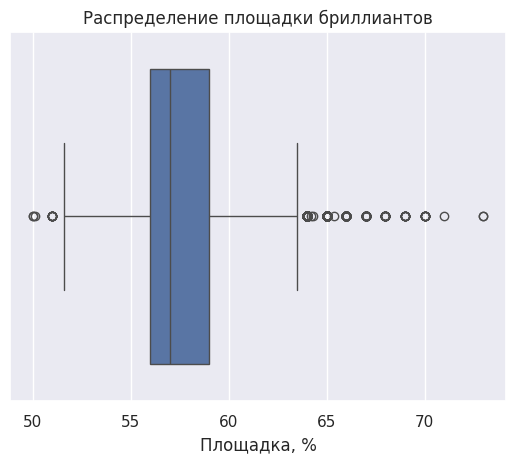

In [31]:
diamonds_new.drop(diamonds_index, inplace=True)
sns.boxplot(x=diamonds_new.table).set(
    title="Распределение площадки бриллиантов", xlabel="Площадка, %"
);

Рассмотрим бриллианты, имеющие ширину более 15 мм и глубину более 10 мм.

In [32]:
diamonds_index = diamonds_new[(diamonds_new.y > 15) | (diamonds_new.z > 10)].index
diamonds_new.loc[diamonds_index]

,carat,cut,color,clarity,depth,table,price,x,y,z
24012,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
48268,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49047,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


Данные записи однозначно являются аномалиями и их необходимо удалить.

In [33]:
diamonds_new.drop(diamonds_index, inplace=True)
diamonds_new[(diamonds_new.y > 15) | (diamonds_new.z > 10)]

,carat,cut,color,clarity,depth,table,price,x,y,z


Пересчитаем индексы всех строк в наборе данных во избежании возможных проблем в дальнейшем.

In [34]:
diamonds_new.reset_index(drop=True, inplace=True)
diamonds_new

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53761,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53762,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53763,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53764,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Визуализация зависимостей между признаками

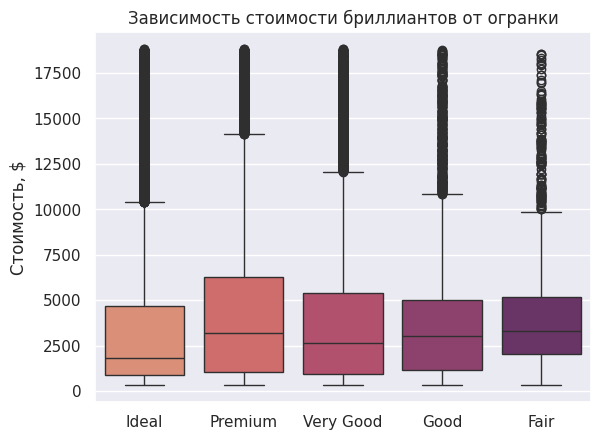

In [35]:
sns.boxplot(
    diamonds_new, x="cut", y="price", hue="cut",
    order=cut_order, hue_order=cut_order, palette="flare", legend=None
).set(
    title="Зависимость стоимости бриллиантов от огранки", xlabel="", ylabel="Стоимость, $"
);

Из полученной диаграммы видно, что стоимость бриллиантов слабо зависит от их огранки. В общем, бриллианты с огранкой "Premium" стоят дороже остальных. Также, недорогих бриллиантов с огранкой "Fair" меньше остальных, но это, скорее, связано с тем, что бриллиантов с такой огранкой в наборе данных представлено намного меньше, чем остальных.

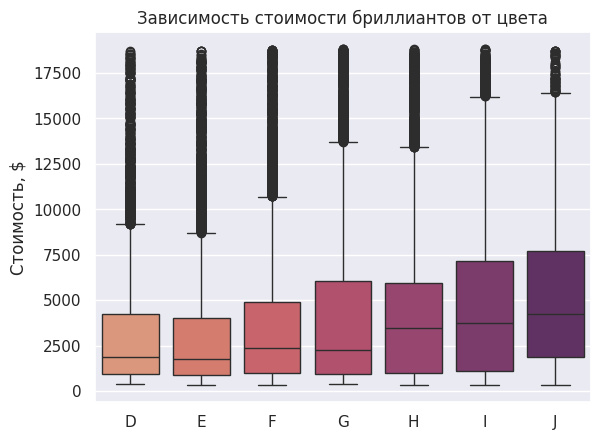

In [36]:
sns.boxplot(
    diamonds_new, x="color", y="price", hue="color",
    order=color_order, hue_order=color_order, palette="flare", legend=None
).set(
    title="Зависимость стоимости бриллиантов от цвета", xlabel="", ylabel="Стоимость, $"
);

Из полученной диаграммы видно, что стоимость бриллиантов слабо зависит от их цвета, притом общая тенденция говорит о том, что в целом бриллианты "плохого" цвета стоят дороже, чем бриллианты "хорошего" цвета.

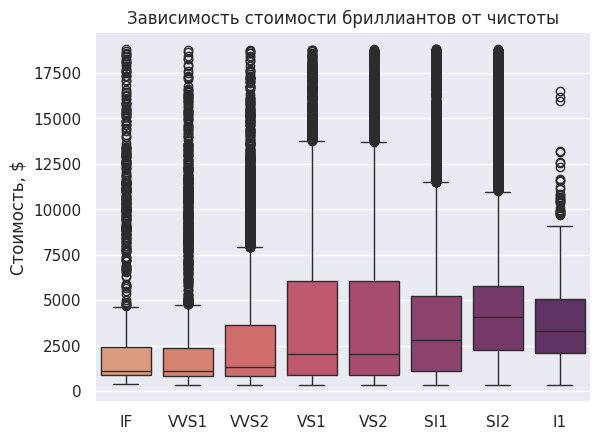

In [37]:
sns.boxplot(
    diamonds_new, x="clarity", y="price", hue="clarity",
    order=clarity_order, hue_order=clarity_order, palette="flare", legend=None
).set(
    title="Зависимость стоимости бриллиантов от чистоты", xlabel="", ylabel="Стоимость, $"
);

Из полученной диаграммы видно, что стоимость бриллиантов слабо зависит от их чистоты, притом общая тенденция говорит о том, что в целом менее чистые бриллианты стоят дороже, чем более чистые бриллианты.

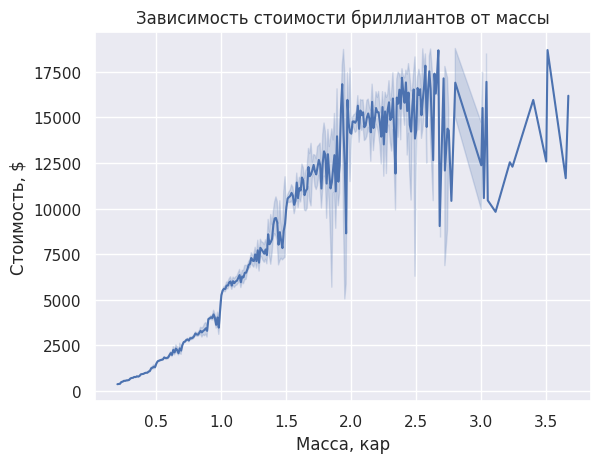

In [38]:
sns.lineplot(diamonds_new, x="carat", y="price").set(
    title="Зависимость стоимости бриллиантов от массы",
    xlabel="Масса, кар", ylabel="Стоимость, $"
);

Из полученного графика видно, что стоимость бриллиантов сильно зависит от их массы. Наибольший разброс значений наблюдается от 2 до 3 карат.

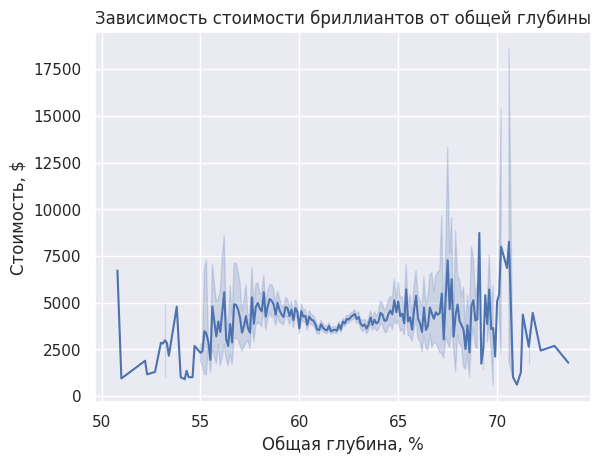

In [39]:
sns.lineplot(diamonds_new, x="depth", y="price").set(
    title="Зависимость стоимости бриллиантов от общей глубины",
    xlabel="Общая глубина, %", ylabel="Стоимость, $"
);

Из полученного графика видно, что стоимость бриллиантов слабо зависит от их общей глубины.

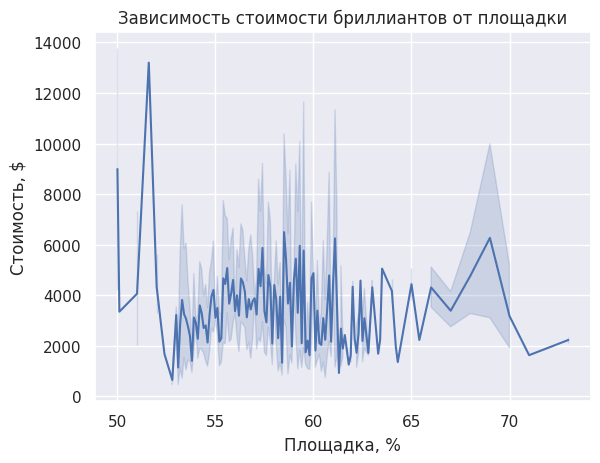

In [40]:
sns.lineplot(diamonds_new, x="table", y="price").set(
    title="Зависимость стоимости бриллиантов от площадки",
    xlabel="Площадка, %", ylabel="Стоимость, $"
);

Из полученного графика видно, что стоимость бриллиантов слабо зависит от их площадки.

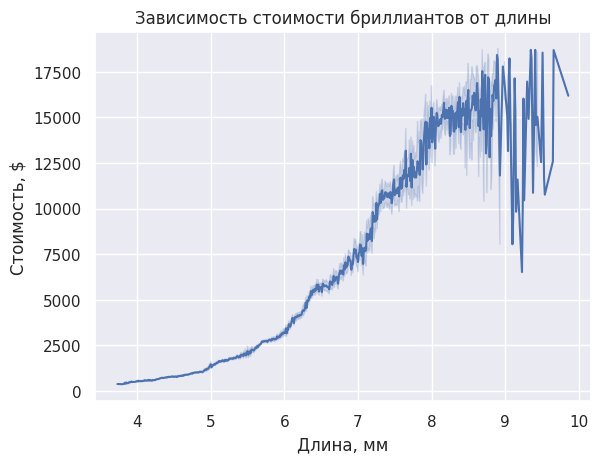

In [41]:
sns.lineplot(diamonds_new, x="x", y="price").set(
    title="Зависимость стоимости бриллиантов от длины",
    xlabel="Длина, мм", ylabel="Стоимость, $"
);

Из полученного графика видно, что стоимость бриллиантов сильно зависит от их длины. Наибольший разброс значений наблюдается от 8,5 до 9,5 мм.

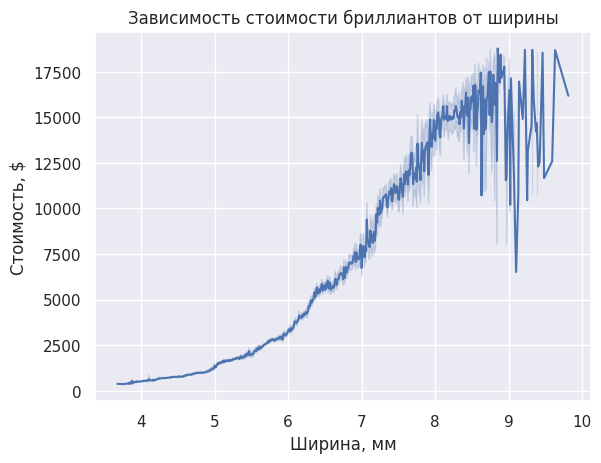

In [42]:
sns.lineplot(diamonds_new, x="y", y="price").set(
    title="Зависимость стоимости бриллиантов от ширины",
    xlabel="Ширина, мм", ylabel="Стоимость, $"
);

Из полученного графика видно, что стоимость бриллиантов сильно зависит от их ширины. Наибольший разброс значений наблюдается от 8,5 до 9,5 мм.

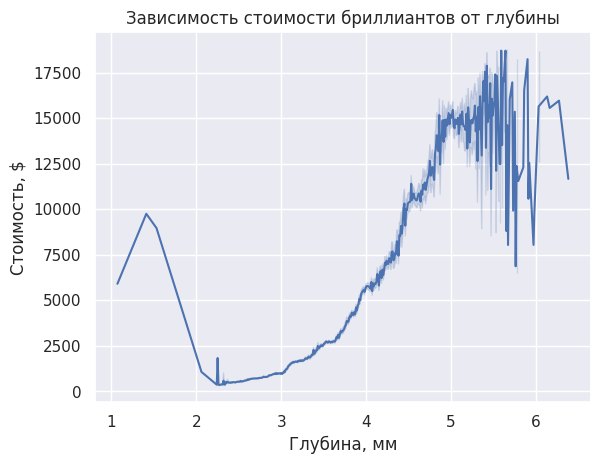

In [43]:
sns.lineplot(diamonds_new, x="z", y="price").set(
    title="Зависимость стоимости бриллиантов от глубины",
    xlabel="Глубина, мм", ylabel="Стоимость, $"
);

Из полученного графика видно, что стоимость бриллиантов сильно зависит от их глубины. Наибольший разброс значений наблюдается от 5,5 до 6 мм. Также, присутствует бриллиант, имеющий аномально высокую стоимость для глубины 1,5 мм.

# Кодирование категориальных признаков

Кодирование огранки, цвета и чистоты лучше всего осуществить с помощью OrdinalEncoder, явно указывая необходимый порядок, так как значения каждого из перечисленных признаков образуют собой отношение порядка, то есть их можно расположить от "худшего" к "лучшему".

In [44]:
cut_encoder = OrdinalEncoder(categories=[cut_order[::-1]])
color_encoder = OrdinalEncoder(categories=[color_order[::-1]])
clarity_encoder = OrdinalEncoder(categories=[clarity_order[::-1]])
diamonds_or = diamonds_new.copy()
diamonds_or.cut = cut_encoder.fit_transform(diamonds_or[["cut"]])
diamonds_or.color = color_encoder.fit_transform(diamonds_or[["color"]])
diamonds_or.clarity = clarity_encoder.fit_transform(diamonds_or[['clarity']])
diamonds_or

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53761,0.72,4.0,6.0,2.0,60.8,57.0,2757,5.75,5.76,3.50
53762,0.72,1.0,6.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53763,0.70,2.0,6.0,2.0,62.8,60.0,2757,5.66,5.68,3.56
53764,0.86,3.0,2.0,1.0,61.0,58.0,2757,6.15,6.12,3.74


# Корреляционная матрица зависимости признаков в виде тепловой карты

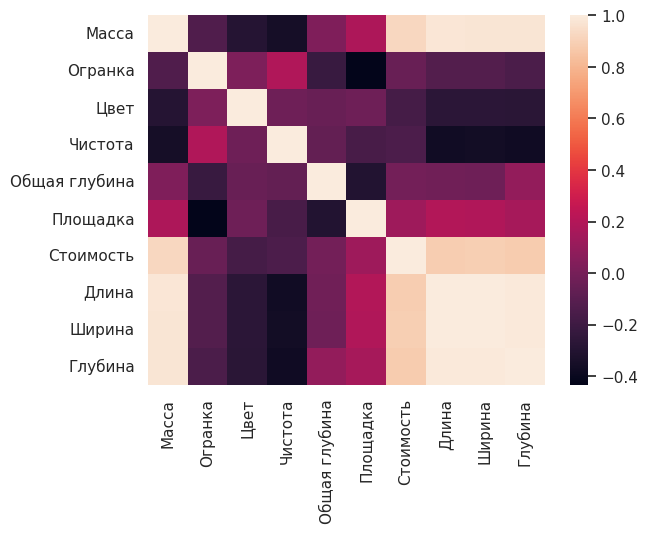

In [45]:
diamonds_labels = [
    "Масса", "Огранка", "Цвет", "Чистота", "Общая глубина",
    "Площадка", "Стоимость", "Длина", "Ширина", "Глубина"
]
sns.heatmap(
    diamonds_or.corr(), xticklabels=diamonds_labels, yticklabels=diamonds_labels
);

Полученная тепловая карта подтверждает ранее выявленные зависимости стоимости бриллиантов от других признаков, а именно сильную зависимость стоимости бриллиантов от массы, длины, ширины и глубины. В то время как, зависимость стоимости бриллиантов от остальных признаков либо крайне мала, либо и вовсе обратная.

# Подготовка к применению регрессии

Отделение целевого признака — стоимости.

In [46]:
y = diamonds_or.price
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53761,2757
53762,2757
53763,2757
53764,2757


Копирование набора данных и удаление целевого признака из него.

In [47]:
X_or = diamonds_or.drop(columns=["price"])
X_or

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53761,0.72,4.0,6.0,2.0,60.8,57.0,5.75,5.76,3.50
53762,0.72,1.0,6.0,2.0,63.1,55.0,5.69,5.75,3.61
53763,0.70,2.0,6.0,2.0,62.8,60.0,5.66,5.68,3.56
53764,0.86,3.0,2.0,1.0,61.0,58.0,6.15,6.12,3.74


Разбиение набора данных на тренировочную и тестовую выборки. Объём записей тестовой выборки составляет 30% от общего объёма набора данных.

In [48]:
X_train_or, X_test_or, y_train, y_test = train_test_split(X_or, y, test_size=0.3, random_state=50)

Получаем следующую тренировочную выборку.

In [49]:
X_train_or

,carat,cut,color,clarity,depth,table,x,y,z
27924,0.30,3.0,5.0,3.0,61.9,59.0,4.29,4.33,2.67
46014,0.50,4.0,5.0,3.0,61.8,55.0,5.11,5.06,3.14
11464,1.17,4.0,2.0,1.0,62.3,57.0,6.74,6.78,4.21
43397,0.52,4.0,6.0,2.0,62.2,54.0,5.14,5.18,3.21
4398,0.31,4.0,6.0,2.0,61.5,56.0,4.33,4.35,2.67
...,...,...,...,...,...,...,...,...,...
48417,0.54,4.0,6.0,3.0,61.3,56.0,5.26,5.22,3.21
22637,0.31,4.0,2.0,5.0,62.3,54.0,4.36,4.38,2.72
42891,0.54,3.0,5.0,2.0,62.2,61.0,5.24,5.15,3.23
38368,0.47,1.0,2.0,4.0,65.1,59.0,4.81,4.87,3.15


In [50]:
y_train

,price
27924,658
46014,1746
11464,5019
43397,1429
4398,571
...,...
48417,1993
22637,630
42891,1375
38368,1031


И получаем следующую тестовую выборку.

In [51]:
X_test_or

,carat,cut,color,clarity,depth,table,x,y,z
46981,0.72,4.0,0.0,2.0,62.7,56.0,5.67,5.75,3.58
4104,0.78,3.0,5.0,4.0,62.2,58.0,5.90,5.86,3.66
2309,0.71,4.0,3.0,6.0,62.1,56.0,5.72,5.84,3.59
53340,0.72,4.0,3.0,2.0,61.4,56.0,5.75,5.78,3.54
2006,0.66,4.0,6.0,5.0,61.6,57.0,5.57,5.64,3.45
...,...,...,...,...,...,...,...,...,...
20506,1.50,3.0,0.0,5.0,61.5,60.0,7.31,7.27,4.48
46517,0.59,4.0,5.0,2.0,62.9,57.0,5.36,5.33,3.36
35347,0.31,4.0,4.0,7.0,61.7,56.0,4.38,4.41,2.71
48028,0.69,3.0,4.0,2.0,61.2,58.0,5.73,5.70,3.50


In [52]:
y_test

,price
46981,1832
4104,3538
2309,3167
53340,2686
2006,3103
...,...
20506,8870
46517,1789
35347,901
48028,1946


# Нормализация

Инициализация StandardScaler.

In [53]:
standard_scaler = StandardScaler()

Нормализация тренировочной и тестовой выборок с помощью StandardScaler.

In [54]:
X_train_or_st = standard_scaler.fit_transform(X_train_or)
X_train_or_st

array([[-1.05153214,  0.08511543,  0.93255018, ..., -1.28745135,
        -1.26246519, -1.25657693],
       [-0.62798543,  0.98092205,  0.93255018, ..., -0.55391856,
        -0.60466428, -0.57601575],
       [ 0.79089606,  0.98092205, -0.8287515 , ...,  0.90420148,
         0.94522278,  0.97334693],
       ...,
       [-0.54327609,  0.08511543,  0.93255018, ..., -0.43762678,
        -0.52356554, -0.44569552],
       [-0.69151743, -1.70649781, -0.8287515 , ..., -0.82228422,
        -0.77587274, -0.56153572],
       [-1.03035481, -0.81069119,  0.34544962, ..., -1.25166926,
        -1.2264213 , -1.27105695]])

In [55]:
X_test_or_st = standard_scaler.transform(X_test_or)
X_test_or_st

array([[-1.62084044e-01,  9.80922053e-01, -2.00295262e+00, ...,
        -5.29693446e-02,  1.70927370e-02,  6.11053517e-02],
       [-3.50200297e-02,  8.51154339e-02,  9.32550179e-01, ...,
         1.52777656e-01,  1.16213421e-01,  1.76945552e-01],
       [-1.83261379e-01,  9.80922053e-01, -2.41650940e-01, ...,
        -8.24173576e-03,  9.81914786e-02,  7.55853767e-02],
       ...,
       [-1.03035481e+00,  9.80922053e-01,  3.45449620e-01, ...,
        -1.20694165e+00, -1.19037742e+00, -1.19865683e+00],
       [-2.25616051e-01,  8.51154339e-02,  3.45449620e-01, ...,
         7.03786001e-04, -2.79621194e-02, -5.47348486e-02],
       [ 1.51092547e+00,  9.80922053e-01,  9.32550179e-01, ...,
         1.37831414e+00,  1.30566163e+00,  1.43670773e+00]])

# Линейная регрессия

Строим модель линейной регрессии на тренировочной выборке с нормализацией.

In [56]:
line_model_or_st = LinearRegression()
line_model_or_st.fit(X_train_or_st, y_train)

LinearRegression()

Предсказываем стоимость бриллиантов с помощью модели линейной регрессии.

In [57]:
y_train_pred = line_model_or_st.predict(X_train_or_st)
y_test_pred = line_model_or_st.predict(X_test_or_st)

Оцениваем результат с помощью метрики r2.

In [58]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9099953346786651, 0.9114795913452556)

Оцениваем результат с помощью метрики MSE.

In [59]:
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(1420052.5599155757, 1427568.5236143323)

Теперь строим модель линейной регрессии на тренировочной выборке без нормализации.

In [60]:
line_model_or = LinearRegression()
line_model_or.fit(X_train_or, y_train)

LinearRegression()

Предсказываем стоимость бриллиантов с помощью модели линейной регрессии.

In [61]:
y_train_pred = line_model_or.predict(X_train_or)
y_test_pred = line_model_or.predict(X_test_or)

Оцениваем результат с помощью метрики r2.

In [62]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9099953346786651, 0.9114795913452556)

Оцениваем результат с помощью метрики MSE.

In [63]:
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(1420052.5599155757, 1427568.523614332)

Исходя из полученных значений метрик можно сделать вывод, что нормализация не влияет на регрессию.

# Полиномиальная регрессия

Строим модель полиномиальной регрессии на тренировочной выборке.

In [64]:
poly_model = LinearRegression()
pf = PolynomialFeatures()
X_train_or_poly = pf.fit_transform(X_train_or)
X_test_or_poly = pf.fit_transform(X_test_or)
poly_model.fit(X_train_or_poly, y_train)

LinearRegression()

Предсказываем стоимость бриллиантов с помощью модели полиномиальной регрессии.

In [65]:
y_train_pred = poly_model.predict(X_train_or_poly)
y_test_pred = poly_model.predict(X_test_or_poly)

Оцениваем результат с помощью метрики r2.

In [66]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9660988051376502, 0.965711864821892)

Оцениваем результат с помощью метрики MSE.

In [67]:
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(534877.5908071178, 552964.7146638741)

Исходя из полученных значений метрик можно сделать вывод, что на данном наборе данных полиномиальная регрессия строится значительно эффективнее, чем линейная регрессия.

Теперь рассмотрим точность полиномиальной регрессии в зависимости от степени полиномов от 1 до 5.

In [68]:
for degree in range(1, 5):
  pf = PolynomialFeatures(degree=degree)
  X_train_or_poly = pf.fit_transform(X_train_or)
  X_test_or_poly = pf.fit_transform(X_test_or)
  poly_model.fit(X_train_or_poly, y_train)
  y_train_pred = poly_model.predict(X_train_or_poly)
  y_test_pred = poly_model.predict(X_test_or_poly)
  print(f"Степень: {degree},", r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

Степень: 1, 0.9099953346786651 0.9114795913452557
Степень: 2, 0.9660988051376502 0.965711864821892
Степень: 3, 0.9777987051555866 0.7262759765565087
Степень: 4, 0.981111768117658 -2.612971426701388


Таким образом, для данного набора данных эффективнее всего строится полиномиальная регрессия с полиномами 2 степени.

In [69]:
pf = PolynomialFeatures(degree=2)

# Построение регрессии после перекодирования категориальных признаков

Перекодирование огранки, цвета и чистоты с помощью OneHotEncoder в тренировочной выборке.

In [70]:
one_hot_encoder = OneHotEncoder()
X_train_oh = X_train_or.copy()
enc_cut_train = one_hot_encoder.fit_transform(X_train_oh[["cut"]])
enc_color_train = one_hot_encoder.fit_transform(X_train_oh[["color"]])
enc_clarity_train = one_hot_encoder.fit_transform(X_train_oh[["clarity"]])
X_train_oh[cut_order[::-1]] = enc_cut_train.toarray()
X_train_oh[color_order[::-1]] = enc_color_train.toarray()
X_train_oh[clarity_order[::-1]] = enc_clarity_train.toarray()
X_train_oh.drop(columns=["cut", "color", "clarity"], inplace=True)
X_train_oh

,carat,depth,table,x,y,z,Fair,Good,Very Good,Premium,...,E,D,I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF
27924,0.30,61.9,59.0,4.29,4.33,2.67,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
46014,0.50,61.8,55.0,5.11,5.06,3.14,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11464,1.17,62.3,57.0,6.74,6.78,4.21,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
43397,0.52,62.2,54.0,5.14,5.18,3.21,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4398,0.31,61.5,56.0,4.33,4.35,2.67,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48417,0.54,61.3,56.0,5.26,5.22,3.21,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22637,0.31,62.3,54.0,4.36,4.38,2.72,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42891,0.54,62.2,61.0,5.24,5.15,3.23,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38368,0.47,65.1,59.0,4.81,4.87,3.15,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Перекодирование огранки, цвета и чистоты с помощью OneHotEncoder в тестовой выборке.

In [71]:
X_test_oh = X_test_or.copy()
enc_cut_test = one_hot_encoder.fit_transform(X_test_oh[["cut"]])
enc_color_test = one_hot_encoder.fit_transform(X_test_oh[["color"]])
enc_clarity_test = one_hot_encoder.fit_transform(X_test_oh[["clarity"]])
X_test_oh[cut_order[::-1]] = enc_cut_test.toarray()
X_test_oh[color_order[::-1]] = enc_color_test.toarray()
X_test_oh[clarity_order[::-1]] = enc_clarity_test.toarray()
X_test_oh.drop(columns=["cut", "color", "clarity"], inplace=True)
X_test_oh

,carat,depth,table,x,y,z,Fair,Good,Very Good,Premium,...,E,D,I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF
46981,0.72,62.7,56.0,5.67,5.75,3.58,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4104,0.78,62.2,58.0,5.90,5.86,3.66,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2309,0.71,62.1,56.0,5.72,5.84,3.59,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53340,0.72,61.4,56.0,5.75,5.78,3.54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2006,0.66,61.6,57.0,5.57,5.64,3.45,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20506,1.50,61.5,60.0,7.31,7.27,4.48,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
46517,0.59,62.9,57.0,5.36,5.33,3.36,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35347,0.31,61.7,56.0,4.38,4.41,2.71,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48028,0.69,61.2,58.0,5.73,5.70,3.50,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Строим модель полиномиальной регрессии на тренировочной выборке.

In [72]:
X_train_oh_poly = pf.fit_transform(X_train_oh)
X_test_oh_poly = pf.fit_transform(X_test_oh)
poly_model.fit(X_train_oh_poly, y_train)

LinearRegression()

Предсказываем стоимость бриллиантов с помощью модели полиномиальной регрессии.

In [73]:
y_train_pred = poly_model.predict(X_train_oh_poly)
y_test_pred = poly_model.predict(X_test_oh_poly)

Оцениваем результат с помощью метрики r2.

In [74]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9729962535994124, 0.971161585285463)

Оцениваем результат с помощью метрики MSE.

In [75]:
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(426052.7947808011, 465077.07932054234)

Исходя из полученных значений метрик можно сделать вывод, что полиномиальная регрессия строится немного эффективнее при кодировании категориальных признаков с помощью OneHotEncoder, нежели OrdinalEncoder.

# Построение регрессии после удаления категориальных признаков

Удаление категориальныз признаков в тренировочной выборке.

In [76]:
X_train_no = X_train_or.copy()
X_train_no.drop(columns=["cut", "color", "clarity"], inplace=True)
X_train_no

,carat,depth,table,x,y,z
27924,0.30,61.9,59.0,4.29,4.33,2.67
46014,0.50,61.8,55.0,5.11,5.06,3.14
11464,1.17,62.3,57.0,6.74,6.78,4.21
43397,0.52,62.2,54.0,5.14,5.18,3.21
4398,0.31,61.5,56.0,4.33,4.35,2.67
...,...,...,...,...,...,...
48417,0.54,61.3,56.0,5.26,5.22,3.21
22637,0.31,62.3,54.0,4.36,4.38,2.72
42891,0.54,62.2,61.0,5.24,5.15,3.23
38368,0.47,65.1,59.0,4.81,4.87,3.15


Удаление категориальныз признаков в тестовой выборке.

In [77]:
X_test_no = X_test_or.copy()
X_test_no.drop(columns=["cut", "color", "clarity"], inplace=True)
X_test_no

,carat,depth,table,x,y,z
46981,0.72,62.7,56.0,5.67,5.75,3.58
4104,0.78,62.2,58.0,5.90,5.86,3.66
2309,0.71,62.1,56.0,5.72,5.84,3.59
53340,0.72,61.4,56.0,5.75,5.78,3.54
2006,0.66,61.6,57.0,5.57,5.64,3.45
...,...,...,...,...,...,...
20506,1.50,61.5,60.0,7.31,7.27,4.48
46517,0.59,62.9,57.0,5.36,5.33,3.36
35347,0.31,61.7,56.0,4.38,4.41,2.71
48028,0.69,61.2,58.0,5.73,5.70,3.50


Строим модель полиномиальной регрессии на тренировочной выборке.

In [78]:
X_train_no_poly = pf.fit_transform(X_train_no)
X_test_no_poly = pf.fit_transform(X_test_no)
poly_model.fit(X_train_no_poly, y_train)

LinearRegression()

Предсказываем стоимость бриллиантов с помощью модели полиномиальной регрессии.

In [79]:
y_train_pred = poly_model.predict(X_train_no_poly)
y_test_pred = poly_model.predict(X_test_no_poly)

Оцениваем результат с помощью метрики r2.

In [80]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.8817190456355279, 0.8790655511900061)

Оцениваем результат с помощью метрики MSE.

In [81]:
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(1866182.9521264948, 1950309.7101048352)

Исходя из полученных значений метрик можно сделать вывод, что полиномиальная регрессия строится значительно менее эффективно после удаления категориальных признаков.

# Гребневая регрессия

Строим модель гребневой регрессии на тренировочной выборке.

In [82]:
ridge_model = RidgeCV()
ridge_model.fit(X_train_oh, y_train)

RidgeCV()

Предсказываем стоимость бриллиантов с помощью модели гребневой регрессии.

In [83]:
y_train_pred = ridge_model.predict(X_train_oh)
y_test_pred = ridge_model.predict(X_test_oh)

Оцениваем результат с помощью метрики r2.

In [84]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9219940331951062, 0.9238270686694492)

Оцениваем результат с помощью метрики MSE.

In [85]:
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(1230742.5671158088, 1228440.771698833)

Исходя из полученных значений метрик можно сделать вывод, что гребневая регрессия строится менее эффективно по сравнению с полиномиальной регрессией, но эффективнее линейной регрессии.

# Вывод

На данном наборе данных наиболее эффективно строится полиномиальная регрессия с полиномами второй степени. Достигнутая точность после предобратки данных — 97%. Менее эффективно строятся гребневая и линейная модели с точностями предсказания 92% и 91% соответственно. Выбор кодировки категориальных признаков почти не влияет на точность. Нормализация вовсе не влияет на построение регрессии.